In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
def mul(x,X,i):
    wyn = 1
    for j in range(len(X)):
        if j is not i:
            wyn *= (x - X[j])/(X[i] - X[j])
    return wyn

def L(X,Y,x):
    wyn = 0
    for i in range(len(X)):
        wyn += Y[i]*mul(x,X,i)
    return wyn

In [3]:
def r(X,Y,l,p,pom):
    if pom[l][p]:
        return pom[l][p]
    if l == p:
        pom[l][p] = Y[l]
    else:
        pom[l][p] = (r(X,Y,l+1,p,pom) - r(X,Y,l,p-1,pom))/(X[p] - X[l])
    return pom[l][p]

def mulN(X,k,x):
    il = 1
    for j in range(k):
        il *= x - X[j]
    return il
        
def N(X,Y,x,pom):
    wyn = 0
    for i in range(len(Y)):
        wyn += r(X,Y,0,i,pom) * mulN(X,i,x)
    return wyn

In [4]:
def czeb(k):
    return [math.cos((2*j -1)/(2*k) * math.pi) for j in range(1,k+1)]

In [5]:
def reg(k): # k rowno od 0 do 1
    return [x/(k - 1) for x in range(k)]

In [6]:
def scale(x,l,p): # z [o,1] a [l,p]
    return x * (p-l) + l

In [7]:
def f(x):
    k = 1
    m = 1
    return math.sin(m*x)*math.sin(k*x**2/math.pi)

In [8]:
def diff(Y_1,Y_2):
    diff=0
    for i in range(len(Y_1)):
        diff = max(diff,abs(Y_1[i]-Y_2[i]))
    return diff

def error(Y_1,Y_2):
    error = 0
    for i in range(len(Y_1)):
        error += (Y_1[i] - Y_2[i]) ** 2
    return error/len(Y_1)

In [9]:
points = 30
n = 1000

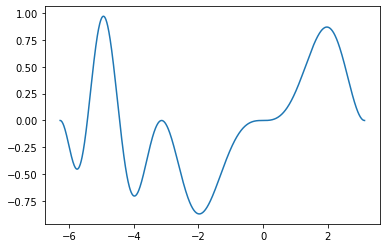

In [10]:
f_X = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
f_Y = [f(x) for x in f_X]

plt.plot(f_X,f_Y)

Max difference: 
0.07077003873031232
standard error: 
7.02806416941482e-05


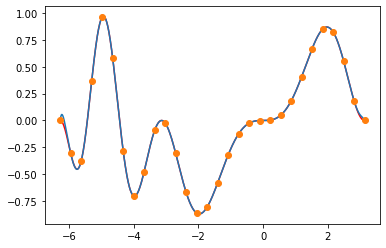

In [14]:
X = [scale(x,(-2) * math.pi,math.pi) for x in reg(points)]
Y = [f(x) for x in X]
X_L = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
Y_L = [L(X,Y,x) for x in X_L]

print("Max difference: ")
print(diff(f_Y,Y_L))
print("standard error: ")
print(error(f_Y,Y_L))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_L,Y_L)
plt.plot(X,Y,'o')

Max difference: 
4.2289591147826044e-06
standard error: 
5.803952881924939e-12


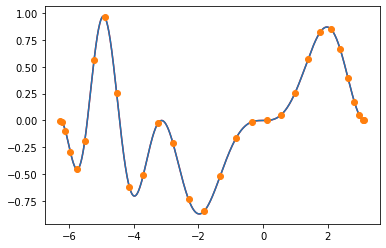

In [15]:
X = [scale((x + 1)/2,(-2) * math.pi,math.pi) for x in czeb(points)]
Y = [f(x) for x in X]
X_L = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
Y_L = [L(X,Y,x) for x in X_L]

print("Max difference: ")
print(diff(f_Y,Y_L))
print("standard error: ")
print(error(f_Y,Y_L))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_L,Y_L)
plt.plot(X,Y,'o')

Max difference: 
0.07077003875346428
standard error: 
7.028063515226712e-05


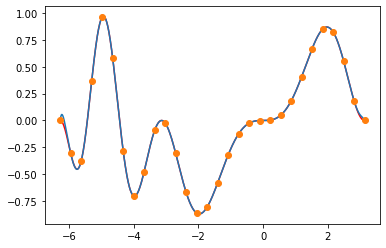

In [25]:
X = [scale(x,(-2) * math.pi,math.pi) for x in reg(points)]
pom = [[None for _ in X] for _ in X]
Y = [f(x) for x in X]
X_N = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
Y_N = [N(X,Y,x,pom) for x in X_N]

print("Max difference: ")
print(diff(f_Y,Y_N))
print("standard error: ")
print(error(f_Y,Y_N))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_N,Y_N)
plt.plot(X,Y,'o')

Max difference: 
4.228959394447784e-06
standard error: 
5.8039477910907095e-12


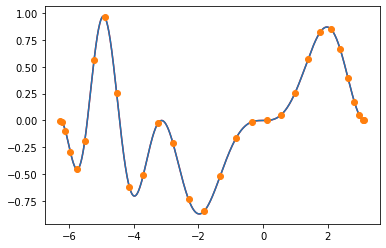

In [17]:
X = [scale((x + 1)/2,(-2) * math.pi,math.pi) for x in czeb(points)]
pom = [[None for _ in X] for _ in X]
Y = [f(x) for x in X]
X_N = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
Y_N = [N(X,Y,x,pom) for x in X_N]

print("Max difference: ")
print(diff(f_Y,Y_N))
print("standard error: ")
print(error(f_Y,Y_N))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_N,Y_N)
plt.plot(X,Y,'o')

In [18]:
def differror(name,points,X,Y,f_X,f_Y):
    if name == "l":
        Y_L = [L(X,Y,x) for x in f_X]

        print("Max difference: ",end="")
        print(diff(f_Y,Y_L))
        print("standard error: ",end="")
        print(error(f_Y,Y_L))
    elif name == "n":
        pom = [[None for _ in X] for _ in X]
        Y_N = [N(X,Y,x,pom) for x in f_X]

        print("Max difference: ",end="")
        print(diff(f_Y,Y_N))
        print("standard error: ",end="")
        print(error(f_Y,Y_N))

In [19]:
for i in [3,4,5,7,10,15,20,25,30]:
    X = [scale((x + 1)/2,(-2) * math.pi,math.pi) for x in czeb(i)]
    Y = [f(x) for x in X]
    print("number of points:",end="")
    print(i)
    differror("l",i,X,Y,f_X,f_Y)

number of points:3
Max difference: 1.5364334976800844
standard error: 0.3036188510352656
number of points:4
Max difference: 1.1918931356987654
standard error: 0.22808700510258048
number of points:5
Max difference: 1.0731699964701986
standard error: 0.12279844080105642
number of points:7
Max difference: 0.9031486909055901
standard error: 0.1107135048392131
number of points:10
Max difference: 0.9810788076886326
standard error: 0.12942378330661777
number of points:15
Max difference: 0.26964786283173686
standard error: 0.009596220279905287
number of points:20
Max difference: 0.01060738610083134
standard error: 3.114291159689119e-05
number of points:25
Max difference: 0.000554916745241274
standard error: 5.723449410576048e-08
number of points:30
Max difference: 4.2289591147826044e-06
standard error: 5.803952881924939e-12


In [20]:
for i in [3,4,5,7,10,15,20,25,30]:
    X = [scale((x + 1)/2,(-2) * math.pi,math.pi) for x in czeb(i)]
    Y = [f(x) for x in X]
    print("number of points:",end="")
    print(i)
    differror("n",i,X,Y,f_X,f_Y)

number of points:3
Max difference: 1.5364334976800844
standard error: 0.30361885103526565
number of points:4
Max difference: 1.1918931356987654
standard error: 0.22808700510258045
number of points:5
Max difference: 1.0731699964701984
standard error: 0.1227984408010563
number of points:7
Max difference: 0.903148690905593
standard error: 0.11071350483921304
number of points:10
Max difference: 0.9810788076886353
standard error: 0.12942378330661808
number of points:15
Max difference: 0.26964786283145237
standard error: 0.009596220279901207
number of points:20
Max difference: 0.010607386100658589
standard error: 3.1142911596123255e-05
number of points:25
Max difference: 0.0005549167574961378
standard error: 5.723449547994647e-08
number of points:30
Max difference: 4.228959394447784e-06
standard error: 5.8039477910907095e-12


In [21]:
for i in [3,4,5,7,10,15,20,25,30]:
    X = [scale(x,(-2) * math.pi,math.pi) for x in reg(i)]
    Y = [f(x) for x in X]
    print("number of points:",end="")
    print(i)
    differror("l",i,X,Y,f_X,f_Y)

number of points:3
Max difference: 1.3176931433430394
standard error: 0.401734322774855
number of points:4
Max difference: 0.9706714699242147
standard error: 0.24884918607012957
number of points:5
Max difference: 1.371126282376343
standard error: 0.20821376423185656
number of points:7
Max difference: 1.2612555683331963
standard error: 0.1739438245346297
number of points:10
Max difference: 5.201174668137978
standard error: 1.7894778064610837
number of points:15
Max difference: 7.406549199497775
standard error: 2.228118030438629
number of points:20
Max difference: 4.038381769148907
standard error: 0.3656982032041055
number of points:25
Max difference: 0.43526008100180813
standard error: 0.00427988408682323
number of points:30
Max difference: 0.07077003873031232
standard error: 7.02806416941482e-05


In [22]:
for i in [3,4,5,7,10,15,20,25,30]:
    X = [scale(x,(-2) * math.pi,math.pi) for x in reg(i)]
    Y = [f(x) for x in X]
    print("number of points:",end="")
    print(i)
    differror("n",i,X,Y,f_X,f_Y)

number of points:3
Max difference: 1.3176931433430394
standard error: 0.401734322774855
number of points:4
Max difference: 0.9706714699242147
standard error: 0.24884918607012957
number of points:5
Max difference: 1.3711262823763428
standard error: 0.20821376423185645
number of points:7
Max difference: 1.2612555683331959
standard error: 0.17394382453462953
number of points:10
Max difference: 5.201174668137977
standard error: 1.789477806461087
number of points:15
Max difference: 7.406549199497772
standard error: 2.2281180304410175
number of points:20
Max difference: 4.038381769148832
standard error: 0.3656982032097008
number of points:25
Max difference: 0.4352600810148006
standard error: 0.0042798840721003
number of points:30
Max difference: 0.07077003875346428
standard error: 7.028063515226712e-05
